In [59]:
import os
import pickle
import numpy as np
from mayavi import mlab
import seaborn as sns
sns.set(style='ticks')

In [78]:
palette = sns.color_palette('muted')

In [81]:
working_dir = '/media/jswaney/Drive/Justin/organoid_phenotyping/datasets/d35_wt/20190419_15_50_16_AA_org2_488LP13_561LP120_642LP60/'
os.listdir(working_dir)

['niche_proximities_sample.npy',
 'centroids.npy',
 'centroids_um.npy',
 'cyto_labels.npy',
 'cyto_profiles.npy',
 'cyto_profiles_sample.npy',
 'Ex0_denoised',
 'Ex0_hist.csv',
 'Ex1_denoised',
 'Ex1_hist.csv',
 'Ex1_rescaled',
 'Ex2_denoised',
 'Ex2_hist.csv',
 'Ex2_rescaled',
 'Ex_0_Em_0_destriped_stitched_master',
 'Ex_0_rescaled',
 'Ex_1_Em_1_destriped_stitched',
 'Ex_2_Em_2_destriped_stitched',
 'mesh_ventricles.pkl',
 'metadata.txt',
 'niche_labels.npy',
 'niche_labels_sample.npy',
 'niche_proximities.npy',
 'niche_sample_idx.npy',
 'niche_sample_index.npy',
 'niche_tsne_sample.npy',
 'nuclei_binary.zarr',
 'nuclei_fluorescence',
 'nuclei_foreground.zarr',
 'nuclei_morphologies.csv',
 'nuclei_probability.zarr',
 'nuclei_segmentations.npz',
 'org2_ventricles.gif',
 'organoid_features.xlsx',
 'segment_foreground.tif',
 'segment_ventricles.tif',
 'sox2.zarr',
 'syto.zarr',
 'syto_down6x',
 'syto_down6x.tif',
 'tbr1.zarr',
 'voxel_size.csv']

Read the ventricle segmenation

In [82]:
with open(os.path.join(working_dir, 'mesh_ventricles.pkl'), mode='rb') as f:
    mesh = pickle.load(f)
mesh.keys()

dict_keys(['verts', 'faces', 'normals', 'values'])

In [83]:
verts = mesh['verts']
faces = mesh['faces']
normals = mesh['normals']
values = mesh['values']

normals.shape

(90244, 3)

Read the profile labels

In [84]:
labels = np.load(os.path.join(working_dir, 'cyto_labels.npy'))

labels.shape, np.unique(labels)

((90244,), array([0, 1, 2, 3, 4, 5]))

Make the rendered ventricles

In [102]:
n_clusters = 6

surf = mlab.triangular_mesh([vert[0] for vert in verts],
                     [vert[1] for vert in verts],
                     [vert[2] for vert in verts],
                     faces,
                     colormap='cool',
                    vmin=0,
                    vmax=255,
                     scalars=labels)

lut = surf.module_manager.scalar_lut_manager.lut.table.to_array()

# # Class 0 RGBA color
# lut[0, 0] = palette[0][0] * 255
# lut[0, 1] = palette[0][1] * 255
# lut[0, 2] = palette[0][2] * 255
# lut[0, 3] = 255

# Use seaborn color palette
for i in range(n_clusters):
#     if i != 3:
#         lut[i, 3] = 0
#         continue
    color = palette[i]
    print(color)
    for j, c in enumerate(color):
        val = int(c * 255)
        lut[i, j] = val
    
surf.module_manager.scalar_lut_manager.lut.table = lut

mlab.show()

(0.2823529411764706, 0.47058823529411764, 0.8156862745098039)
(0.9333333333333333, 0.5215686274509804, 0.2901960784313726)
(0.41568627450980394, 0.8, 0.39215686274509803)
(0.8392156862745098, 0.37254901960784315, 0.37254901960784315)
(0.5843137254901961, 0.4235294117647059, 0.7058823529411765)
(0.5490196078431373, 0.3803921568627451, 0.23529411764705882)


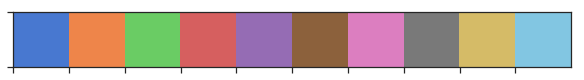

In [79]:
sns.palplot(palette)

In [40]:
palette

[(0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0),
 (0.10196078431372549, 0.788235294117647, 0.2196078431372549),
 (0.9098039215686274, 0.0, 0.043137254901960784),
 (0.5450980392156862, 0.16862745098039217, 0.8862745098039215),
 (0.6235294117647059, 0.2823529411764706, 0.0),
 (0.9450980392156862, 0.2980392156862745, 0.7568627450980392),
 (0.6392156862745098, 0.6392156862745098, 0.6392156862745098),
 (1.0, 0.7686274509803922, 0.0),
 (0.0, 0.8431372549019608, 1.0)]

In [58]:
np.unique(labels)

array([0, 1, 2, 3, 6, 7], dtype=int32)